<a href="https://colab.research.google.com/github/HARSHGit45/Machine_Learning_assignment/blob/main/Brain_Tumor_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from zipfile import ZipFile

data_path = '/content/Brain-Tumor-Classification-DataSet-master.zip'

with ZipFile(data_path, 'r') as zip:
    zip.extractall()
    print('The data set has been extracted.')

The data set has been extracted.


In [5]:
import os
import tensorflow as tf
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
from keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [6]:
xtrain=[]
ytrain=[]
xtest=[]
ytest=[]


img_size = 150


labels= ['glioma_tumor','meningioma_tumor','no_tumor','pituitary_tumor']
for i in labels:
  folderpth = os.path.join('/content/Brain-Tumor-Classification-DataSet-master/Training',i)
  for j in os.listdir(folderpth):
    img = cv2.imread(os.path.join(folderpth,j))
    img = cv2.resize(img,(img_size,img_size))
    xtrain.append(img)
    ytrain.append(i)

for i in labels:
  folderpth = os.path.join('/content/Brain-Tumor-Classification-DataSet-master/Testing',i)
  for j in os.listdir(folderpth):
    img = cv2.imread(os.path.join(folderpth,j))
    img = cv2.resize(img,(img_size,img_size))
    xtest.append(img)
    ytest.append(i)


In [8]:
xtrain = np.array(xtrain)
ytrain = np.array(ytrain)
xtest = np.array(xtest)
ytest = np.array(ytest)

In [10]:
xtrain.shape

(2870, 150, 150, 3)

In [11]:
ytrn=[]
ytst=[]
for i in ytrain:
  ytrn.append(labels.index(i))
ytrain=ytrn
ytrain = tf.keras.utils.to_categorical(ytrain)

for i in ytest:
  ytst.append(labels.index(i))
ytest=ytst
ytest = tf.keras.utils.to_categorical(ytest)



In [12]:
model = Sequential()

In [13]:
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))


model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))


model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))


model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dense(4,activation='softmax'))





/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [15]:
history = model.fit(xtrain,ytrain,epochs=25,validation_split=0.1)

Epoch 1/25
81/81 ━━━━━━━━━━━━━━━━━━━━ 34s 249ms/step - accuracy: 0.3791 - loss: 35.7818 - val_accuracy: 0.8188 - val_loss: 0.8486
Epoch 2/25
81/81 ━━━━━━━━━━━━━━━━━━━━ 14s 71ms/step - accuracy: 0.5859 - loss: 0.9225 - val_accuracy: 0.9338 - val_loss: 0.5795
Epoch 3/25
81/81 ━━━━━━━━━━━━━━━━━━━━ 5s 66ms/step - accuracy: 0.6546 - loss: 0.8081 - val_accuracy: 0.9756 - val_loss: 0.1743
Epoch 4/25
81/81 ━━━━━━━━━━━━━━━━━━━━ 5s 68ms/step - accuracy: 0.7201 - loss: 0.6768 - val_accuracy: 0.9791 - val_loss: 0.1828
Epoch 5/25
81/81 ━━━━━━━━━━━━━━━━━━━━ 5s 67ms/step - accuracy: 0.7818 - loss: 0.5385 - val_accuracy: 0.9094 - val_loss: 0.3341
Epoch 6/25
81/81 ━━━━━━━━━━━━━━━━━━━━ 10s 69ms/step - accuracy: 0.8210 - loss: 0.4358 - val_accuracy: 0.9652 - val_loss: 0.1826
Epoch 7/25
81/81 ━━━━━━━━━━━━━━━━━━━━ 5s 68ms/step - accuracy: 0.8684 - loss: 0.3656 - val_accuracy: 0.9756 - val_loss: 0.1261
Epoch 8/25
81/81 ━━━━━━━━━━━━━━━━━━━━ 10s 69ms/step - accuracy: 0.8856 - loss: 0.2907 - val_accuracy: 0.96

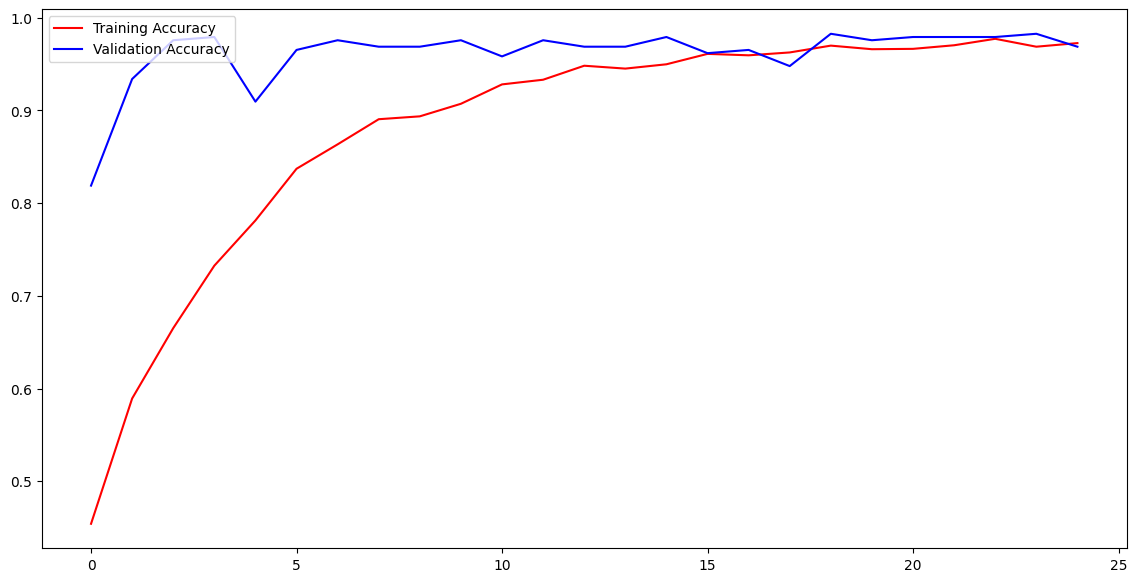

In [16]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']


epochs = range(len(acc))


fig = plt.figure(figsize=(14,7))


plt.plot(epochs,acc,'r',label="Training Accuracy")
plt.plot(epochs,val_acc,'b',label="Validation Accuracy")
plt.legend(loc='upper left')
plt.show()